In [1]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import random
import seaborn as sns
import matplotlib.pylab as plt

In [42]:
def rand_hand():
    hand = set()
    while len(hand) < 10:
        hand.add(random.randint(0,51))
    return list(hand)

def hand_vector(hand):
    V = np.zeros((52,1))
    for c in hand:
        V[c][0] = 1
    return V

In [67]:
M = np.zeros((52,52))
for i in range(52):
    for j in range(52):
        # same rank
        if (i % 13) == (j % 13):
            M[i][j] = 1
        # same suit
        elif (i // 13) == (j // 13):
            M[i][j] = 1 / (1 + abs((i % 13) - (j % 13))**(1/2)) # 1 / number of ranks separation
combo_adj_matrix = M

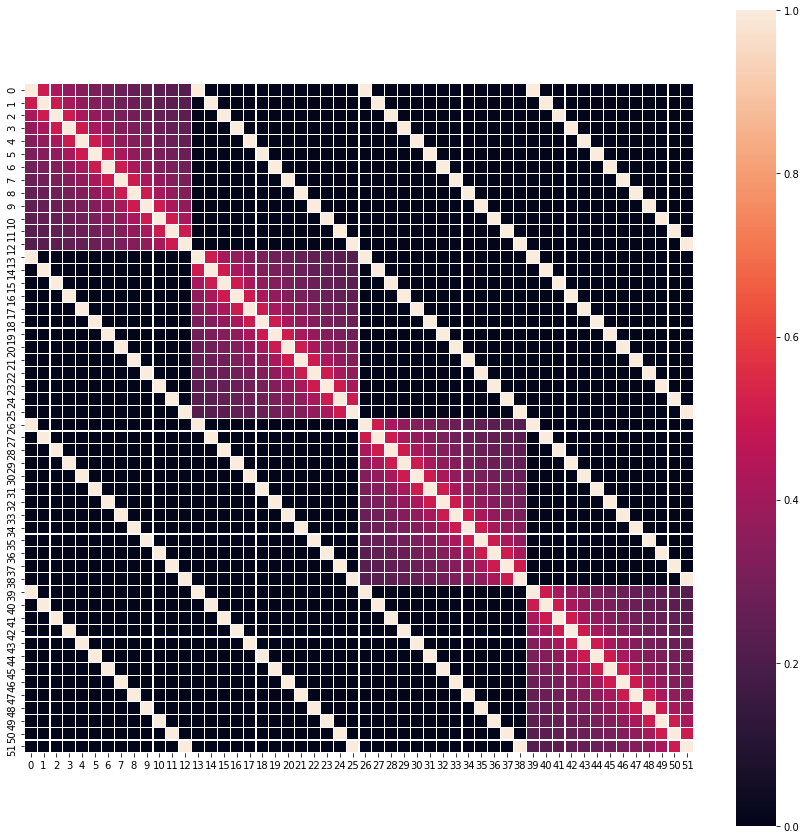

In [68]:
fig, ax = plt.subplots(figsize=(15,15)) 
ax = sns.heatmap(combo_adj_matrix, linewidth=0.1, square=True)
plt.show()

In [65]:
gin_hand = [0,1,2,3,4,5,6,7,8,9]
np.sum(combo_adj_matrix @ hand_vector(gin_hand))

72.33952185525857

In [66]:
avg = 0
for _ in range(10000):
    avg += np.sum(combo_adj_matrix @ hand_vector(rand_hand()))
avg/10000

71.66315217459703